# Aplicación de los métodos de selección de atributos al conjunto de datos load_wine

Antonio Elias Sánchez Soto

BDFC 301

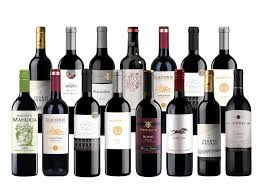

El objetivo de este cuaderno es aplicar métodos de selección de atributos en un conjunto de datos dado y reducir la dimensionalidad de estos, identificar los más relevantes y prepararlos para futuros modelos de aprendizaje.

In [127]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

## Exploración de los Datos

Para iniciar este análisis es necesario cargar el data set teniendo en cuenta la columna de target con la que se enfocará el análisis de los datos.

In [128]:
data=load_wine()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [129]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [130]:
# Verificar valores faltantes
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

**Descripción de las Columnas**

- **alcohol:** Contenido de alcohol en el vino (porcentaje).
- **malic_acid:** Concentración de ácido málico, que influye en la acidez del vino.
- **ash:** Contenido de cenizas, que puede ser un indicador de minerales presentes.
- **alcalinity_of_ash:** Alcalinidad de las cenizas, relacionada con el pH del vino.
- **magnesium:** Concentración de magnesio, un mineral importante para la salud y el sabor del vino.
- **total_phenols:** Total de fenoles, compuestos que afectan el sabor y la coloración del vino.
- **flavanoids:** Concentración de flavonoides, que son antioxidantes y contribuyen al color y sabor.
- **nonflavanoid_phenols:** Fenoles no flavonoides, que también afectan el sabor pero no son antioxidantes.
- **proanthocyanins:** Compuestos que influyen en la astringencia y color del vino.
- **color_intensity:** Intensidad del color del vino, una característica visual importante.
- **hue:** Matiz del color del vino, que puede indicar su edad o tipo.
- **od280/od315_of_diluted_wines:** Relación óptica a 280 nm y 315 nm, utilizada para medir la concentración de compuestos fenólicos.
- **proline:** Un aminoácido que puede influir en el sabor y aroma del vino.
- **target:** Variable objetivo (int), probablemente indicando la clase o tipo de vino (por ejemplo, calidad o variedad).

In [132]:
# Contar la cantidad de muestras por clase
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [133]:
"""valores = df['target'].unique()
valores

# Aplicar One-Hot Encoding a la columna 'target'
df = pd.get_dummies(df, columns=['target'])"""

"valores = df['target'].unique()\nvalores\n\n# Aplicar One-Hot Encoding a la columna 'target'\ndf = pd.get_dummies(df, columns=['target'])"

El data frame puede organizarse aplicando One-Hot Encoding en la columna target puesto que tiene muy pocos valores distintos, siendo una variable que refiere a categorías. No se aplica durante el análisis para establecer una matriz de correlación más sencilla, y puesto que el resto de atributos se debe evaluar contra esta variable objetivo no sería óptimo aplicar esta técnica de codificación.

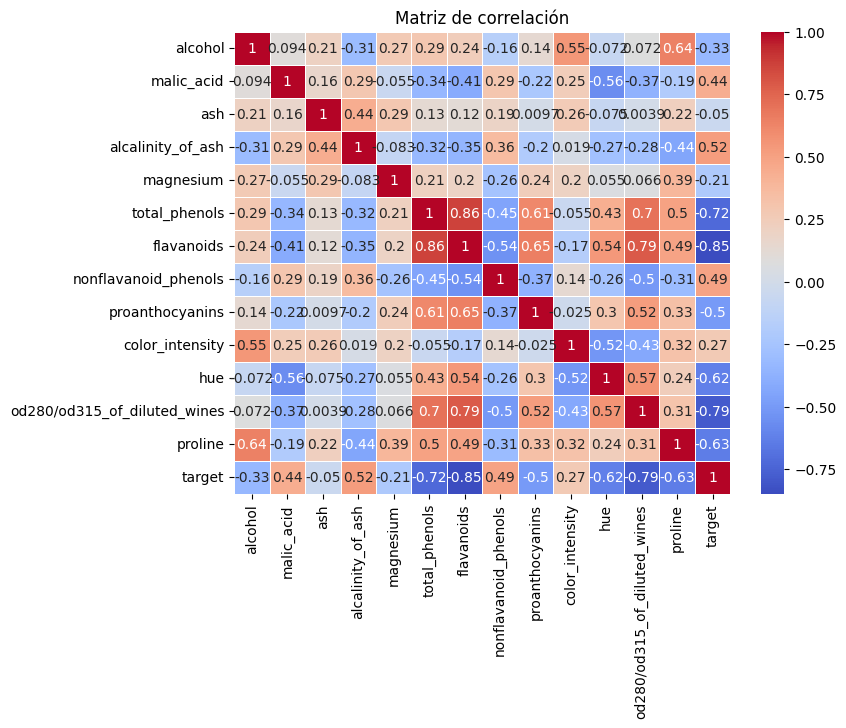

In [134]:
# siendo todos los valores numéricos no es necesario aislar variables categoriales, el caso de la columna target se deja como variable objetivo.

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

correlationMatrix=df.corr()

La matriz de correlación muestra relaciones de interés (mayores a 0.5 o menores a -0.5):
- Alcohol con el color de intensidad del vino y la concentración de prolina (proporcionales).
- La concentración de ácido málico y el matiz del vino (proporcionales).
- Alcalinidad de las cenizas con la variable objetivo (proporcionales).
- Total de fenoles con concentración de flavonoides, proanthocyanins, relación óptica y concentración de prolina (proporcionales). Además, con la variable objetivo (inversamente proporcionales).
- La concentración de flavonoides se relaciona con proanthocyanins, la matiz del color del vino y relación óptica (proporcionales). Además, con la cantidad de fenoles no flavonoides y la variable objeto de estudio (inversamente proporcionales).
- La cantidad de fenoles no flavonoides y la relación óptica (inversamente proporcionales).

## Selección de Atributos

Para la selección de atributos se tienen en cuenta métodos como:

- Selección por correlación: evalúa la relación lineal entre cada característica y el objeto de estudio usando coeficientes de correlación. Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa.
- Ganancia de información: mide cuánta información proporciona una característica sobre la variable objeto de estudio. Se trata de la diferencia entre la entropía del conjunto original y del conjunto después de dividirlo según una característica específica.
- Selección por consistencia: evalúa la estabilidad y confiabilidad de los atributos a través de diferentes subconjuntos. Validación cruzada para evaluar comportamiento en diferentes particiones.

In [135]:
# Aplicar seleccion según correlación

correlationTarget=abs(correlationMatrix['target'])
relevantFeatures=correlationTarget[correlationTarget>0.5]
print("Atributos relevantes basados en la correlación con el target o variable objetivo:")
print(relevantFeatures)

Atributos relevantes basados en la correlación con el target o variable objetivo:
alcalinity_of_ash               0.517859
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64


Al seleccionar aquellos atributos con mayor relación con el target obtenemos una reducción dimensional clave para comprender mejor las asociaciones.

- alcalinity_of_ash (0.517859): Correlación moderada; sugiere que la alcalinidad de las cenizas está relacionada con el tipo de vino.
- total_phenols (0.719163): Correlación alta; indica que el contenido total de fenoles es relevante para clasificar los vinos.
- flavanoids (0.847498): Correlación muy alta; es una característica clave para distinguir entre tipos de vino, relacionada con sabor y color.
- hue (0.617369): Correlación moderada a alta; el color del vino también influye en su clasificación.
- od280/od315_of_diluted_wines (0.788230): Fuerte correlación; medida óptica significativa para la clasificación de vinos.
- proline (0.633717): Correlación moderada a alta; la prolinina es un indicador útil para clasificar tipos de vino.
- target (1.000000): Correlación perfecta con sí misma, como se espera.

In [136]:
# Ganancia de información
from sklearn.feature_selection import mutual_info_classif

# calculo de ganancia de info de cada atributo
X=df.drop(columns=['target'])
y=df['target']
infoGain=mutual_info_classif(X,y)

# Dataframe 
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print('Atributos ordenados por Ganancia de Informacion')
print(infoGainDF)

Atributos ordenados por Ganancia de Informacion
                         Feature  InfoGain
6                     flavanoids  0.666084
12                       proline  0.562615
9                color_intensity  0.553651
11  od280/od315_of_diluted_wines  0.508409
0                        alcohol  0.473698
10                           hue  0.452551
5                  total_phenols  0.430682
8                proanthocyanins  0.278246
1                     malic_acid  0.275283
3              alcalinity_of_ash  0.225175
4                      magnesium  0.191477
7           nonflavanoid_phenols  0.090434
2                            ash  0.085330


Los resultados de este método sugieren que características como la concentración de flavonoides, prolina, la intensidad del color y la óptica son relevantes para la clasificación.
En cambio, el resto de atributos son moderadamente informativos o irrelevantes. 

In [137]:
# Basado en consistencia

from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar los 6 mejores atributos basados en su consistencia con la clase
selector=SelectKBest(score_func=f_classif,k=6)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print("Atributos por consistencia")
print(consistentFeatures)

Atributos por consistencia
Index(['alcohol', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


En cuanto a la consistencia se indican los atributos más estables y relevantes para la clasificación, ya que hay un total de 14 atributos se hace una selección de los 6 mejores.

In [138]:
# Comparacion y seleccion general

selectedFeatures=set(relevantFeatures.index).intersection(consistentFeatures).intersection(infoGainDF["Feature"])
print("Atributos seleccionados en comun por los tres metodos")
print(selectedFeatures)

Atributos seleccionados en comun por los tres metodos
{'flavanoids', 'od280/od315_of_diluted_wines', 'proline', 'hue'}


Por comparación general entre los tres métodos se concluye que 4 de estos atributos son muy relevantes para la clasificación del vino.
Estos valores son la concentración de prolina, flavonoides, la óptica y la matiz del color del vino.
En cada método existen algunas excepciones, es decir, atributos que encuentran una mayor valía en un método y en otro no. Por ejemplo, en la selección por correlación el total de fenoles tiene un valor bastante alto. En infoGain e alcohol posee un porcentaje más alto que en otros casos y en el caso de SelectKBest donde tomo los 6 mejores atributos coincide mucho con el infoGain.
Puede que este último método sea el más eficaz con respecto al conjunto de datos, sin embargo, la intercepción suele contener las variables más relevantes, por tanto considero que una vez aplicado los métodos se proceda con la intersección entre ellos. 

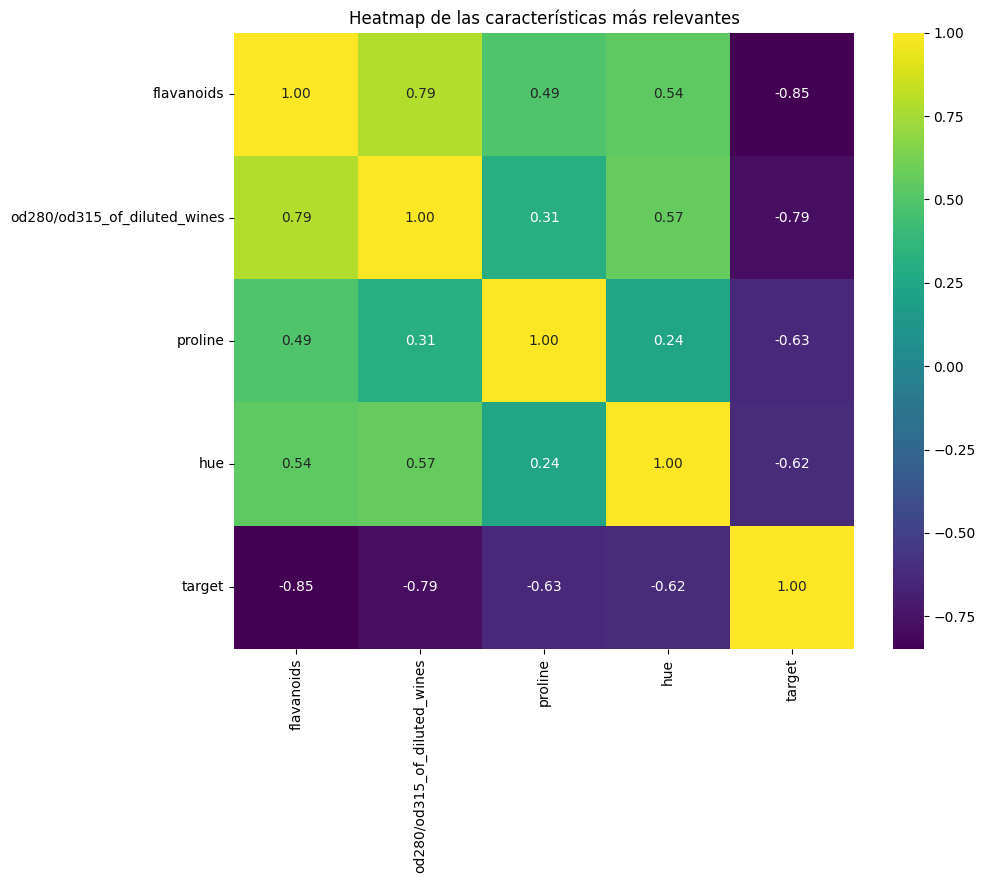

In [139]:
#subconjunto del DataFrame con caracteristicas seleccionadas
selectedDF=df[list(selectedFeatures)+['target']]

#calcular matriz de correlacion para las caracteristicas
correlationMatrixSelected=selectedDF.corr()

# mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrixSelected,annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap de las características más relevantes")
plt.show()

## Conclusiones

- Los métodos para la selección de atributos relevantes en función de una variable objetivo son esenciales para la conformación de un modelo clasificatorio o de predicción.
- Los métodos pueden arrojar resultados un poco distintos entre sí, pues alguno de ellos debe encontrarse más justo al conjunto de datos.
- Es recomendable evaluar todos los resutados y tomar la intersección de estos como los atributos más relevantes para la clasificación de la variable objeto de estudio.
- En este caso podemos definir que para clasificar los vinos se debe tener en cuenta principalmente la concentración de flavonoides, la relación óptica para medir los compuestos fenólicos, la concentración de prolina y su color. Además, según dos de los métodos empleados el contenido de alcohol juega un papel importante. 